# Michael Lockhart - Privacy Task Sheet

Here I submit my code and notes for the privacy scientist role.

## Part 1

In [1]:
# Imports of modules for all sections of task 1
import pandas as pd
import numpy as np
from numpy import random # provided a better distribution than random randint and all possibilities were populated
import matplotlib.pyplot as plt
import seaborn as sns

## A) 
Randomly generate a dataset (dataframe) with eight columns and 50,000 rows. Each column should be a categorical variable (of arbitrary name) with three levels (of arbitrary names) in approximately equal proportions

In [2]:
# A function that simplifies the creation of a list of randomly assigned catagorical variables
def catagorical_maker(column, catagoricals, number_of_rows): 
    '''
    Returns a list of random catagoricals chosen from a 
    Inputs of a column name, list of names and total number required rows.
    
    catagorical_marker(column header string, catagorical value list, integer)
    
    '''
    # length of catagoricals for range
    number_of_catagoricals = (len(catagoricals)) 
    random_catagoricals_list = []
    # iterate over the total number of rows to generate a list of catagoricals
    for f in range(number_of_rows): 
        random_value = random.randint(0,number_of_catagoricals)
        random_catagoricals_list.append(catagoricals[random_value])
    return random_catagoricals_list

In [3]:
# A function to view how evenly matched the columns are
def column_counter(random_list_of_lists, rows):
    '''
    Return the frequency of each catagorical variable in a randomised list
    
    column_counter([[],[],[]])
    '''
    number_of_unique_catagories = len(set(random_list_of_lists[0]))
    exact_distribution = int(rows / number_of_unique_catagories)
    counts = []
    for x, f in enumerate(random_list_of_lists):
        counted = Counter(random_list_of_lists[x]).most_common()
        counts.append(counted)
        for position in range(len(counted)):
            difference = abs(exact_distribution - counted[position][1])
            percent = round(((difference/exact_distribution)*100),2)
            print(f"The randomly assigned value of {counted[position][0]} is {counted[position][1]}, {difference} ({percent}%) far away from the average.")
    return counts

In [73]:
# A predefined dictionary of status that may be found in health data
status_catagoricals = {
                       'Status': ['Single', 'Married', 'Divorced'],
                       'Locations': ['North', 'Midlands', 'South'],
                       'Likes': ['I', 'Like', 'Cheese'],
                       'Book': ['Lion', 'Witch', 'Wardrobe'],
                       'CryoEM': ['Grid', 'Square', 'Holes'],
                       'Christmas': ['Turkey', 'Goose', 'Duck'],
                       'Toys': ['Barbie', 'Ken', 'Actionman'],
                       'Z': ['X', 'Y', 'Z']
                      }

# Iterating through the dictionary to generate a list of lists that can be converted to a Pandas data frame
random_lists = []
column_name = []
number_of_rows = 50000
# enumberating to obtain the column name for a column name list
for x, f in enumerate(status_catagoricals):
    # calling the function to generate the list for each key
    value = catagorical_maker(f, status_catagoricals[f], number_of_rows)
    random_lists.append(value)
    column_name.append(f)

# Generating the data frame using the random list and column names corresponding to the list
# The lists required transforming to a NumPy array in order to transpose to an 8 x 50000 data frame
transposed_list = np.array(random_lists).T
df = pd.DataFrame(transposed_list, columns = column_name)

## B)
Summarize the dataset so you can readily check whether you have achieved the goal set in a).

### Comments
While it appears that there have been appropriate random distributions of the categorical variables across each of the columns, some of the permutations available were not represented shown below with a count less than 3<sup>8</sup>.

In [71]:
# Here the frequency of each row is calculated
# Calculates the frequency of all column possibilities
temp1 = df.groupby(column_name).size()
# Resents the index to make to a single level
temp2 = temp1.reset_index() 
# Provides the column name 'Frequency'
frequency_df = temp2.rename(columns={0:'Frequency'}) 
# Could also have been combined to "frequency_df = df.groupby(column_name).size().reset_index().rename(columns={0:'count'})"

# Overall quick outputs of table
frequency_df.describe()

,Frequency
count,6561.000000
mean,9.907026
std,3.173040
min,1.000000
25%,8.000000
50%,10.000000
75%,12.000000
max,26.000000


In [72]:
#Checking each column for percentage representation
from collections import Counter
counted_column_catagoricals = column_counter(random_lists, number_of_rows)

The randomly assigned value of Divorced is 21828, 162 (0.75%) far away from the average.
The randomly assigned value of Single is 21717, 51 (0.24%) far away from the average.
The randomly assigned value of Married is 21455, 211 (0.97%) far away from the average.
The randomly assigned value of North is 21726, 60 (0.28%) far away from the average.
The randomly assigned value of Midlands is 21709, 43 (0.2%) far away from the average.
The randomly assigned value of South is 21565, 101 (0.47%) far away from the average.
The randomly assigned value of Cheese is 21739, 73 (0.34%) far away from the average.
The randomly assigned value of Like is 21718, 52 (0.24%) far away from the average.
The randomly assigned value of I is 21543, 123 (0.57%) far away from the average.
The randomly assigned value of Lion is 21826, 160 (0.74%) far away from the average.
The randomly assigned value of Wardrobe is 21603, 63 (0.29%) far away from the average.
The randomly assigned value of Witch is 21571, 95 (0.4

## c)
How many unique rows (i.e., permutations of category levels) are possible?

### Answer
It is possible to produce 3<sup>8</sup> different combinations of catagorical variables = 6561.

In [10]:
total_possibilities = 3**8
print(total_possibilities)

6561


## d)
Produce a table and appropriate graph which show the frequencies (numbers of groups)
by permutation group sizes up to group size of 12. That is, how many groups are unique
combinations (group size = 1), how many groups are made up of a pair of matching
combinations (group size = 2), how many groups are made up three the same, etc?

In [11]:
# Here the frequency of each row is calculated
# Calculates the frequency of all column possibilities
temp1 = df.groupby(column_name).size() 
# Resents the index to make to a single level
temp2 = temp1.reset_index()
# Provides the column name 'Frequency'
frequency_df = temp2.rename(columns={0:'Frequency'}) 
# Could also have been combined to "frequency_df = df.groupby(column_name).size().reset_index().rename(columns={0:'count'})"
frequency_df

,Status,Piggies,Likes,Book,CryoEM,Christmas,Toys,Z,Frequency
0,Divorced,Bad,Cheese,Lion,Grid,Duck,Actionman,X,6
1,Divorced,Bad,Cheese,Lion,Grid,Duck,Actionman,Y,6
2,Divorced,Bad,Cheese,Lion,Grid,Duck,Actionman,Z,7
3,Divorced,Bad,Cheese,Lion,Grid,Duck,Barbie,X,11
4,Divorced,Bad,Cheese,Lion,Grid,Duck,Barbie,Y,7
...,...,...,...,...,...,...,...,...,...
6552,Single,Wolf,Like,Witch,Square,Turkey,Barbie,Y,8
6553,Single,Wolf,Like,Witch,Square,Turkey,Barbie,Z,4
6554,Single,Wolf,Like,Witch,Square,Turkey,Ken,X,9
6555,Single,Wolf,Like,Witch,Square,Turkey,Ken,Y,9


    Group size  Number of groups
0            1                 3
1            2                15
2            3                51
3            4               122
4            5               288
5            6               419
6            7               612
7            8               779
8            9               834
9           10               757
10          11               767
11          12               582
12          13               495
13          14               308
14          15               214
15          16               142
16          17                77
17          18                49
18          19                26
19          20                11
20          21                 4
21          22                 3
22          24                 1
23          25                 1
24          26                 1


834

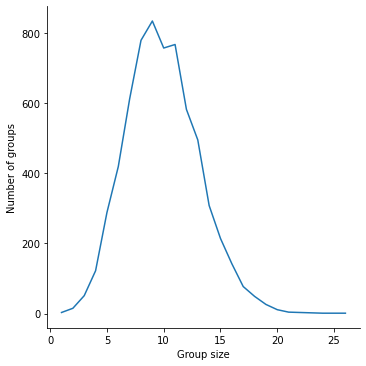

In [78]:
temp3 = frequency_df.groupby('Frequency').size()
#temp3
temp4 = temp3.reset_index()
#temp4
temp5 = temp4.rename(columns={0:'Number of groups', 'Frequency':'Group size'}) 
print(temp5)
#frequency_plot = sns.histplot(data=temp5['Number of groups'], bins=21)
frequency_plot = sns.relplot(x='Group size', y='Number of groups', kind="line", data=temp5)
#plt.axvline(12, 0,12, color='red')
temp5['Number of groups'].max()

## e)
Comment upon the distribution of group sizes in d).

### Answer
The distribution of the group sizes in part d) broadly represents a normal distribution. If the assignment of the categorical values were close to random this would be the case. That said it seems that there are some groups that are not represented and some of the larger groups that have a low representation.

Below, the histogram of all frequency values for each of the (up to) 6561 unique permutations is shown and, again broadly represents a normal distribution.

6561


Text(0.5, 0, 'Combination Occurance')

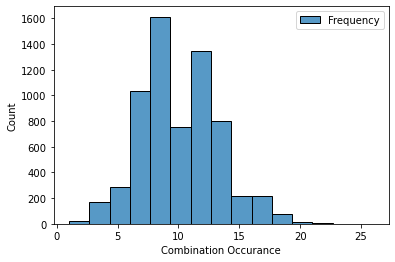

In [79]:
print(len(frequency_df))
#for f in range(len(frequency_df)):
#    if (frequency_df['Frequency'].iloc[f]) == 0:
#        print(frequency_df.iloc[f])
frequency_plot = sns.histplot(data=frequency_df, bins=15)
frequency_plot.set_xlabel("Combination Occurance")

## f)
If your random variables were, in fact, meaningful information on individuals, which
group sizes are of most concern from a privacy perspective?

## g)
Consider the effect of missing data in the dataset you created in Part a). How might
this complicate the production of a frequency table of group sizes in Part d)?

### Answer


# Nothing to see here
## Sand box

https://stackoverflow.com/questions/35268817/unique-combinations-of-values-in-selected-columns-in-pandas-data-frame-and-count

In [22]:
#example = {'X': ['a', 'a', 'a', 'b', 'b', 'c', 'c','c'],
#          'Y': ['a', 'a', 'a', 'c', 'c', 'a', 'a', 'b'],
#          'Z': ['b', 'b', 'b', 'c', 'c', 'c', 'c', 'a']}
#ex_df = pd.DataFrame(example)
#ex_df = ex_df.astype("category")
#ex_df_freq = ex_df.groupby(['X', 'Y', 'Z']).size().reset_index().rename(columns={0:'count'})
#ex_df

In [23]:
'''
test1 = pd.get_dummies(ex_df)
test1_drop = test1.drop_duplicates()
lists = []
columns = ['X', 'Y', 'Z']
for f in range(0, len(test1_drop)):
    #print(test1_drop.iloc[f])
    counter = 0
    for g in range(0, len(test1)):
        #print(counter)
        if (test1_drop.iloc[f] == test1.iloc[g]).sum() == 9:
            counter += 1
        print((test1_drop.iloc[f] == test1.iloc[g]).sum())
    lists.append(counter)
lists
test1
'''

"\ntest1 = pd.get_dummies(ex_df)\ntest1_drop = test1.drop_duplicates()\nlists = []\ncolumns = ['X', 'Y', 'Z']\nfor f in range(0, len(test1_drop)):\n    #print(test1_drop.iloc[f])\n    counter = 0\n    for g in range(0, len(test1)):\n        #print(counter)\n        if (test1_drop.iloc[f] == test1.iloc[g]).sum() == 9:\n            counter += 1\n        print((test1_drop.iloc[f] == test1.iloc[g]).sum())\n    lists.append(counter)\nlists\ntest1\n"

In [16]:
# keep, this could be useful
c = []
for f in range(1, len(lists)):
    counter = 0
    for g in lists:
        #print(g)
        if f == g:
            #print(f == lists[g])
            counter += 1
    c.append(counter)
#c

In [17]:
# Do this (new version)
from numpy.random import default_rng
rng = default_rng()
vals = rng.standard_normal(10)
more_vals = rng.standard_normal(10)

# instead of this (legacy version)
from numpy import random
vals = random.standard_normal(10)
more_vals = random.standard_normal(10)

In [18]:
#from scipy.stats import norm
#import matplotlib.pyplot as plt

# Generate some data for this demonstration.
#data = norm.rvs(10.0, 2.5, size=500)
#data
# Fit a normal distribution to the data:
#mu, std = norm.fit(frequency_df['Frequency'])

# Plot the histogram.
#plt.hist(frequency_df['Frequency'], bins=15, density=True, alpha=0.6, color='g')

# Plot the PDF.
#xmin, xmax = plt.xlim()
#x = np.linspace(xmin, xmax, 100)
#p = norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
#plt.title(title)

#plt.show()

In [21]:
#status_catagoricals = {
#                       'A': ['A', 'B', 'C'],
#                       'nums': ['1', '2', '3'],
#                       'Z': ['X', 'Y', 'Z'],
#                        'make': ['cooper', 'dog', 'black']
#                        }

# Iterating through the dictionary to generate a list of lists that can be converted to a Pandas data frame
#random_lists = []
#column_name = []
#for x, f in enumerate(status_catagoricals): # enumberating to obtain the column name for a column name list
#    value = catagorical_maker(f, status_catagoricals[f], 20000) # calling the function to generate the list for each key
#    random_lists.append(value)
#    column_name.append(f)

# Generating the data frame using the random list and column names corresponding to the list
# The lists required transforming to a NumPy array in order to transpose to an 8 x 50000 data frame
#transposed_list = np.array(random_lists).T
#df = pd.DataFrame(transposed_list, columns = column_name)

In [ ]:
# Here the frequency of each row is calculated
#temp1 = df.groupby(column_name).size() # Calculates the frequency of all column possibilities
#temp2 = temp1.reset_index() # Resents the index to make to a single level
#frequency_df = temp2.rename(columns={0:'Frequency'}) # Provides the column name 'Frequency'
# Could also have been combined to "frequency_df = df.groupby(column_name).size().reset_index().rename(columns={0:'count'})"
#frequency_df.describe()

In [ ]:
#frequency_df